# Task

In [83]:
import pandas as pd
from utils import expand_dataset
import numpy as np

In [84]:
df_business = pd.read_csv('../dataset/df_business_final.csv')

In [85]:
print(df_business.shape)
df_business.head(5)

(150346, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,CA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,MO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
def filter_by_city(city, df):
    return df[df['city'].str.contains(city) == True]


df_business_filtered = filter_by_city('Tucson', df_business)

print(df_business_filtered.shape)

df_business_filtered.head(5)

(9262, 66)


,AcceptsInsurance,BikeParking,BusinessAcceptsBitcoin,BusinessAcceptsCreditCards,ByAppointmentOnly,CoatCheck,Corkage,DogsAllowed,DriveThru,GoodForDancing,...,stars,state,street,touristy,trendy,upscale,valet,vegan,vegetarian,video
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.5,AZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Drop non number features

In [87]:
to_drop = ['business_id', 'address', 'categories', 'city', 'latitude', 'longitude', 'name', 'state', 'postal_code']

df_business_filtered.drop(to_drop, axis=1, inplace=True)

/var/folders/03/smk9v43n5dz1mcwcgdj4fzz40000gn/T/ipykernel_62050/702393764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_business_filtered.drop(to_drop, axis=1, inplace=True)


# Utils (duplicated from user_task)


In [88]:
from itertools import combinations

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def score_plot_and_get_best(data_frame, algorithm, number_of_tests):
    if algorithm == "kmeans":
        parameter_to_detect = "n_clusters"
    else:
        parameter_to_detect = "eps"

    # fitted_kmeans = {}
    labels = {}
    df_scores = []
    inertias_for_kmeans = []

    for i in number_of_tests:
        if algorithm == "kmeans":
            model = KMeans(n_clusters=i)
        else:
            model = DBSCAN(eps=i, min_samples=10)

        i_labels = model.fit_predict(data_frame)

        if algorithm == "kmeans":
            inertias_for_kmeans.append(model.inertia_)

        # Insert fitted model and calculated cluster labels in dictionaries, for further reference.
        # fitted_kmeans[i] = kmeans
        labels[i] = i_labels

        # Calculate various scores, and save them for further reference.
        df_scores.append({
            parameter_to_detect: i,
            "silhouette_score": silhouette_score(data_frame, i_labels),
            "calinski_harabasz_score": calinski_harabasz_score(data_frame, i_labels),
            "davies_bouldin_score": davies_bouldin_score(data_frame, i_labels),
        })

    # Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
    df_scores = pd.DataFrame(df_scores)
    df_scores.set_index(parameter_to_detect, inplace=True)

    print(df_scores)

    if algorithm == "kmeans":
        # Plot inertias
        plt.plot(number_of_tests, inertias_for_kmeans, 'bx-')
        plt.title('Inertias')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')

    best_scores_list = [
        df_scores["silhouette_score"].idxmax(),
        df_scores["calinski_harabasz_score"].idxmax(),
        df_scores["davies_bouldin_score"].idxmin()
    ]

    best_parameter = max(set(best_scores_list), key=best_scores_list.count)

    print("Best " + parameter_to_detect + ": ", best_parameter)

    return labels.get(best_parameter)


def add_new_column(algorithm, df_new_column, initial_data_frame):
    if algorithm == 'kmeans':
        df_new_column = pd.DataFrame({'cluster': df_new_column})
    else:
        df_new_column = pd.DataFrame({'eps': df_new_column})

    initial_data_frame = pd.concat([initial_data_frame, df_new_column], axis=1)

    initial_data_frame.head(50)

    return initial_data_frame


def plot_clusters(algorithm, data_frame, num_row, num_col, fig_width, fig_height):
    if algorithm == 'kmeans':
        c_column = 'cluster'
    else:
        c_column = 'eps'

    every_combinations = list(combinations(data_frame.drop(columns=c_column).columns, 2))

    figure, axis = plt.subplots(num_row, num_col, figsize=(fig_width, fig_height))

    next_row = 0
    next_column = 0

    for combination in every_combinations:
        first_feature = combination[0]
        second_feature = combination[1]

        axis[next_row, next_column].scatter(
            data_frame[first_feature],
            data_frame[second_feature],
            c=data_frame[c_column],
            cmap='rainbow'
        )

        axis[next_row, next_column].set_title(first_feature + " and " + second_feature)

        if next_column == (num_col - 1):
            next_row = next_row + 1
            next_column = 0
        else:
            next_column = next_column + 1

# K-Means

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [90]:
df_business_filtered_kmeans = df_business_filtered.copy()

            silhouette_score  calinski_harabasz_score  davies_bouldin_score
n_clusters                                                                 
2                   0.885914             14487.306274              0.461312
3                   0.830901             16650.392603              0.522023
4                   0.801869             20305.621146              0.499421
5                   0.764247             23828.335693              0.499425
6                   0.733286             29061.894227              0.487798
7                   0.678362             32001.073471              0.503381
8                   0.668410             35688.589829              0.512792
9                   0.642700             39457.297681              0.457221
10                  0.642734             44586.539392              0.459848
11                  0.622121             48731.360129              0.465793
12                  0.609599             54572.341200              0.465457
13          

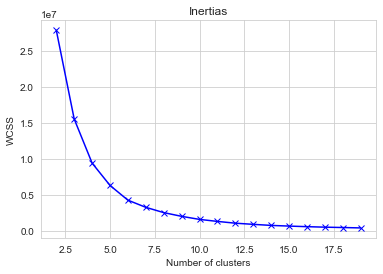

In [97]:
df_cluster_kmeans = score_plot_and_get_best(df_business_filtered_kmeans, "kmeans", np.arange(2, 20))

In [98]:
df_business_merged_filtered_kmeans = add_new_column('kmeans', df_cluster_kmeans, df_business_filtered_kmeans)

IndexError: index 2 is out of bounds for axis 0 with size 2

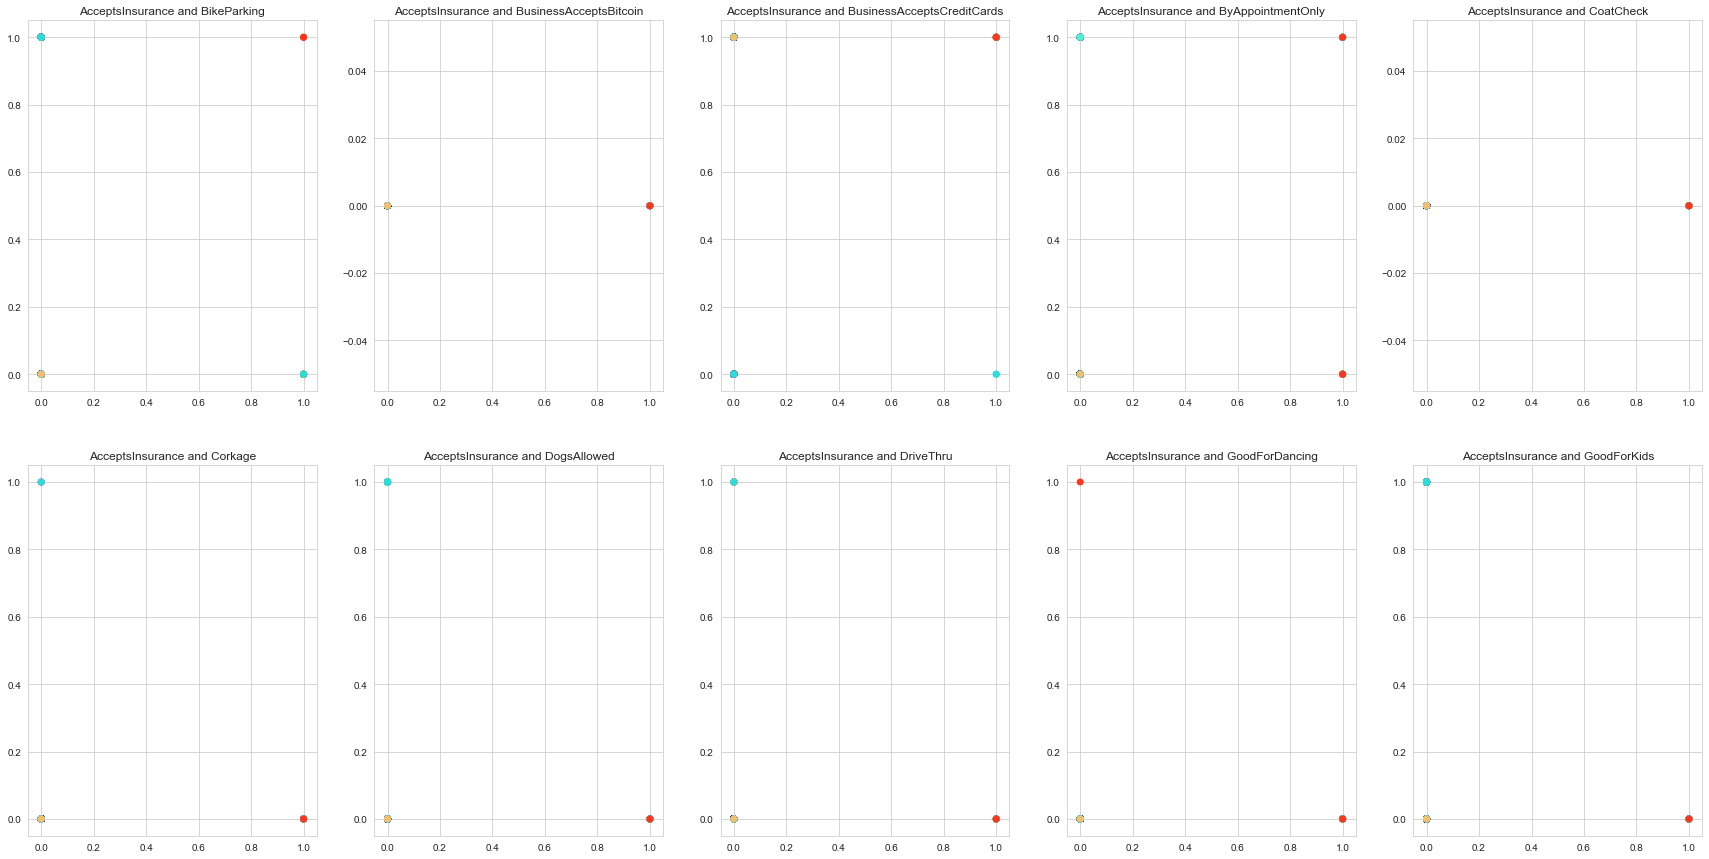

In [100]:
plot_clusters('kmeans', df_business_merged_filtered_kmeans, 2, 5, 30, 15)